# Spatial data Preprocessing

In [ ]:
import geopandas as gpd
import shapely
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Seoul road network (3.2s)
roads = gpd.read_file('data/seoul_road/road.shp', crs='epsg:5174')

In [121]:
# 도로종류 : 
# 광로1류 UQS111, 광로2류 UQS112, 광로3류 UQS113, 
# 대로1류 UQS114, 대로2류 UQS115, 대로3류 UQS116, 
# 중로1류 UQS117, 중로2류 UQS118, 중로3류 UQS119 UQS120, 
# 소로2류 UQS121, 소로3류 UQS122, 소로4류 UQS123, 도로시설 기타 UQS190
broads = ['UQS111', 'UQS112', 'UQS113']
mains = ['UQS114', 'UQS115', 'UQS116']
smalls = ['UQS117', 'UQS118', 'UQS119', 'UQS120']

roads_selected = roads[roads.ATRB_SE.isin(broads+mains+smalls)]

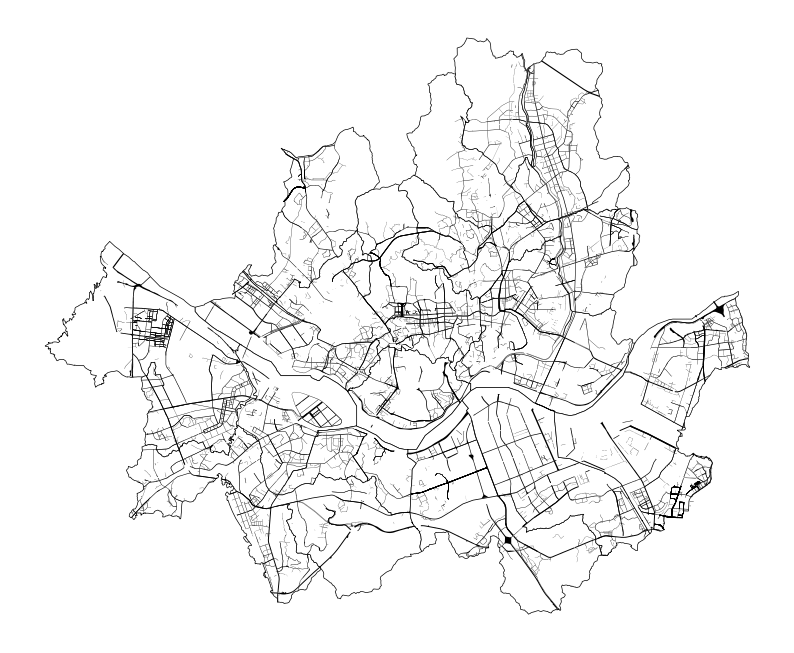

In [122]:
# 서울시 행정구역
fig, ax = plt.subplots(figsize=(10, 10))

seoul = gpd.read_file('data/seoul_geo/seoul.shp')
seoul.to_crs(epsg=5174, inplace=True)
seoul.plot(color='white', edgecolor='black', linewidth=0.5, ax=ax)
roads_selected.plot(ax=ax, color='black', linewidth=0.5)
plt.axis('off')
plt.show()

In [ ]:
# 서울시 교통량 조사자료

traffic = pd.read_excel('data/traffic/04월 서울시 교통량 조사자료(2024).xlsx', sheet_name='2024년 04월')
traffic_info = pd.read_excel('data/traffic/04월 서울시 교통량 조사자료(2024).xlsx', sheet_name='수집지점 주소 및 좌표', skipfooter=4, usecols='A:E')
traffic_info = gpd.GeoDataFrame(traffic_info, geometry=gpd.points_from_xy(traffic_info['경도'], traffic_info['위도']), crs='wgs84')
traffic_info.to_crs(epsg=5174, inplace=True)

In [ ]:
traffic.지점번호.nunique() # 139개 지점

139

In [ ]:
# 링크 데이터

link = pd.read_excel('data/traffic/서울시 서비스링크 보간점 정보_2024년3월 기준.xlsx', engine='openpyxl')
link = gpd.GeoDataFrame(link, geometry=gpd.points_from_xy(link.GRS80TM_X, link.GRS80TM_Y), crs='epsg:5174')

In [ ]:
# groupby link id and make the points to a line object
from shapely.geometry import LineString

link_line = link.groupby('LINK_ID').apply(lambda x: LineString(x['geometry'].tolist())).reset_index()
link_line.columns = ['LINK_ID', 'geometry']
link_line = gpd.GeoDataFrame(link_line, crs='epsg:5174')

C:\Users\Dangchan\AppData\Local\Temp\ipykernel_83640\1057496940.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  link_line = link.groupby('LINK_ID').apply(lambda x: LineString(x['geometry'].tolist())).reset_index()


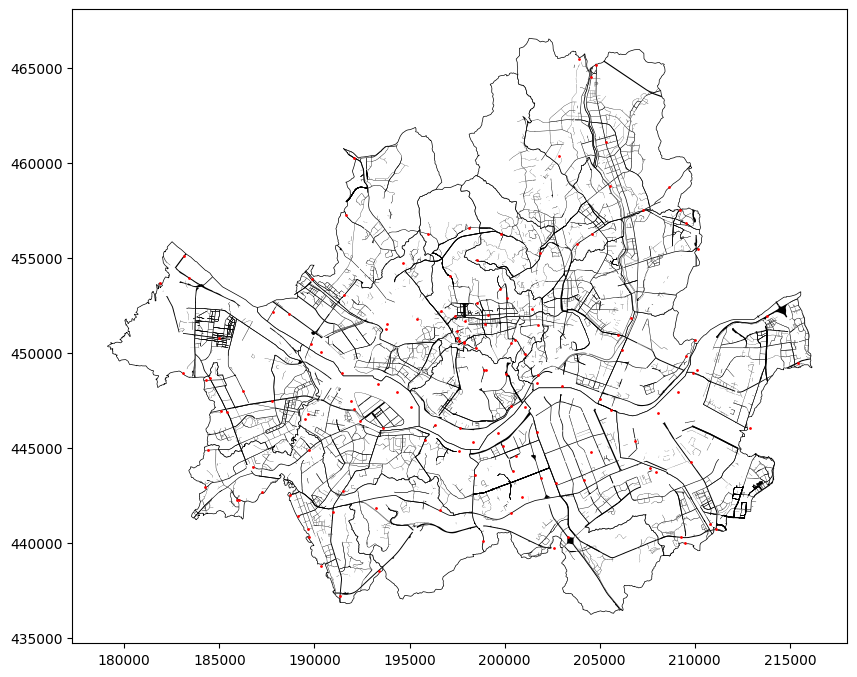

In [123]:
# 서울시 행정구역
fig, ax = plt.subplots(figsize=(10, 10))

seoul = gpd.read_file('data/seoul_geo/seoul.shp')
seoul.to_crs(epsg=5174, inplace=True)
seoul.plot(color='white', edgecolor='black', linewidth=0.5, ax=ax)
roads_selected.plot(ax=ax, color='black', linewidth=0.5)
traffic_info.plot(markersize=1, color='red', ax=ax)
plt.show()

# Using momepy

In [106]:
import momepy
import networkx as nx

# construct the road network

network = momepy.gdf_to_nx(link_line, approach='primal')

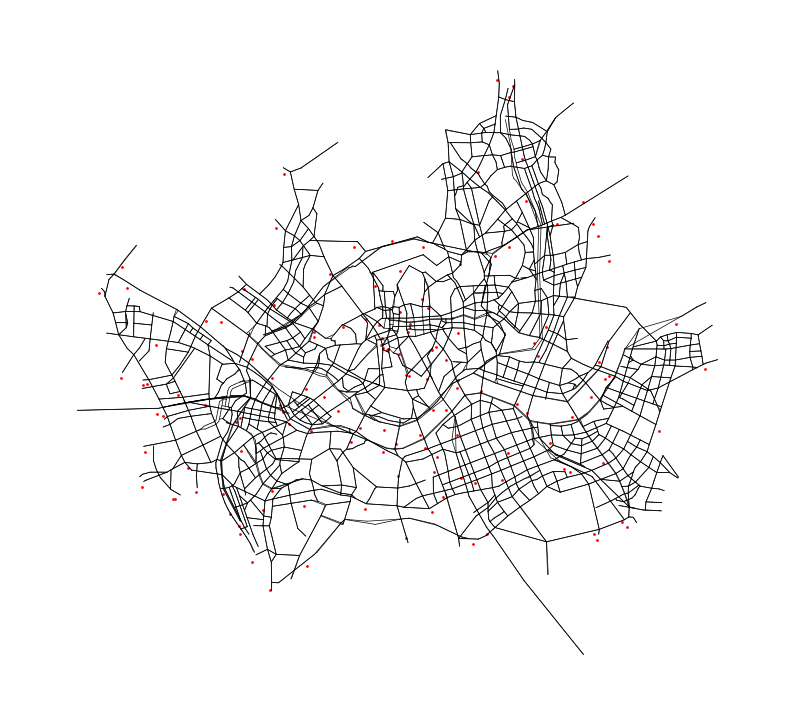

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
traffic_info.plot(markersize=1, color='red', ax=ax)
nx.draw(network, pos={node: node for node in network.nodes()}, node_size=0, edge_color='black', width=0.5, ax=ax)
plt.axis('off')
plt.show()

In [119]:
traffic_info

,지점번호,지점명칭,검지기 유형,위도,경도,geometry
0,A-01,성산로(금화터널),지자기,37.568588,126.948436,POINT (195374.965 451812.661)
1,A-02,사직로(사직터널),지자기,37.572298,126.962853,POINT (196648.808 452223.809)
2,A-03,자하문로(자하문터널),지자기,37.588831,126.968548,POINT (197152.553 454058.607)
3,A-04,대사관로(삼청터널),지자기,37.596359,126.984209,POINT (198535.907 454893.767)
4,A-05,율곡로(안국역),지자기,37.576000,126.984342,POINT (198547.239 452634.128)
...,...,...,...,...,...,...
134,F-06,경부고속도로,영상,37.493135,127.022533,POINT (201922.952 443437.127)
135,F-07,분당수서로,영상,37.497648,127.087195,POINT (207640.833 443941.255)
136,F-08,강남순환로(관악터널),영상,37.449096,126.926169,POINT (193397.163 438551.810)
137,F-09,서부간선지하도로,루프,37.468942,126.883673,POINT (189639.609 440758.318)


In [115]:
link_line[link_line.LINK_ID.isin()]

,LINK_ID,geometry
0,1000000100,"LINESTRING (197521.000 452291.000, 197476.000 ..."
1,1000000200,"LINESTRING (197290.000 452094.000, 197404.000 ..."
2,1000000300,"LINESTRING (198172.000 452291.000, 198270.000 ..."
3,1000000400,"LINESTRING (198497.000 452306.000, 198400.000 ..."
4,1000000500,"LINESTRING (198912.000 452301.000, 198788.000 ..."
...,...,...
5119,3201510100,"LINESTRING (189403.000 441808.000, 189439.000 ..."
5120,3201510200,"LINESTRING (193481.000 449565.000, 193443.000 ..."
5121,3201510300,"LINESTRING (193190.000 449500.000, 193264.000 ..."
5122,3201510600,"LINESTRING (193191.000 449512.000, 192691.000 ..."


In [107]:
len(nx.line_graph(network).nodes)

5124

In [111]:
list(nx.line_graph(network).nodes)[0]

((197521.0, 452291.0), (197282.0, 452103.0), 0)

In [114]:
print(link_line.geometry[0])

LINESTRING (197521 452291, 197476 452271, 197396 452205, 197282 452103)


## Shortest path